# Importing Libraries

In [1]:
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler,LabelEncoder



import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
student=pd.read_csv('student-data.csv')

In [3]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
student.shape

(395, 31)

# Data Exploration

In [5]:
#calculate total number of students
no_students=student.shape[0]

# TODO: Calculate number of features
n_features = student.shape[1] - 1

# TODO: Calculate passing students
# Data filtering using .loc[rows, columns]
passed = student.loc[student.passed == 'yes', 'passed']
n_passed = passed.shape[0]

# TODO: Calculate failing students
failed = student.loc[student.passed == 'no', 'passed']
n_failed = failed.shape[0]

# TODO: Calculate graduation rate
total = float(n_passed + n_failed)
grad_rate = float(n_passed * 100 / total)


print("Total number of students",no_students)
print('Total number of features',n_features)
print('total number of passed students',n_passed)
print('Total number of failed students',n_failed)
print('Total graduation percentage',grad_rate)

Total number of students 395
Total number of features 30
total number of passed students 265
Total number of failed students 130
Total graduation percentage 67.0886075949367


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

* From here we can observe one thing most of the features are in object format.

In [7]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


* From here we can observe one thing minimum number of absences are 0 and Maximum number of absences are 75 and here we can observe another one there is alot of difference between 75% and 100% in the sense it may contain outliers.
* We can observe another one minimum age is 15 and maximum age is 22.

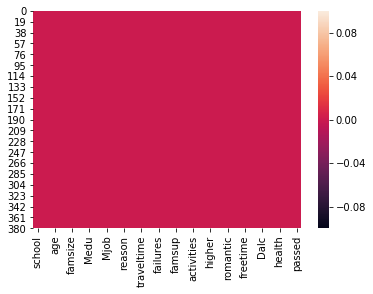

In [8]:
#check null data is present or not
sns.heatmap(student.isnull())

* Wow it's good ,here we can observe that there is no null data present in this dataset.

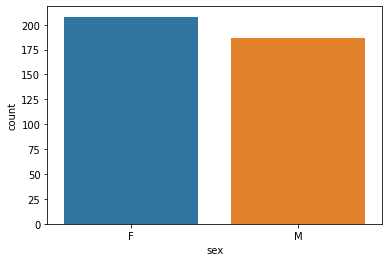

In [9]:
sns.countplot(student['sex'])

From here we can observe that most of students in a class is Female students.

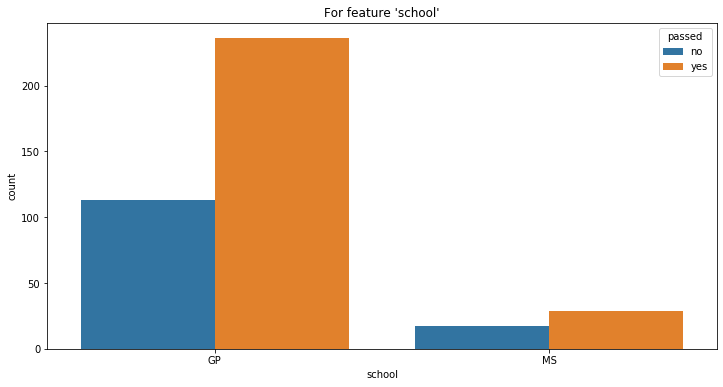

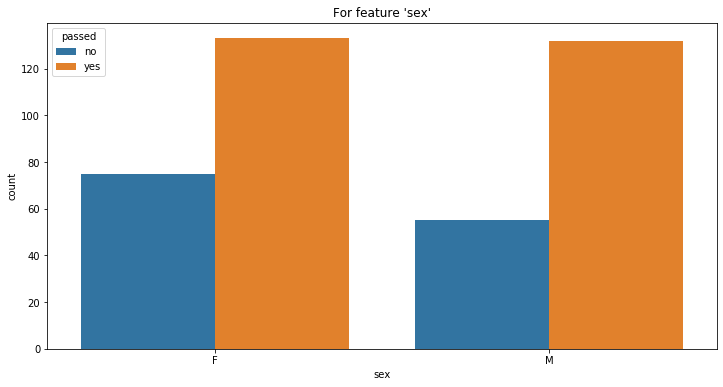

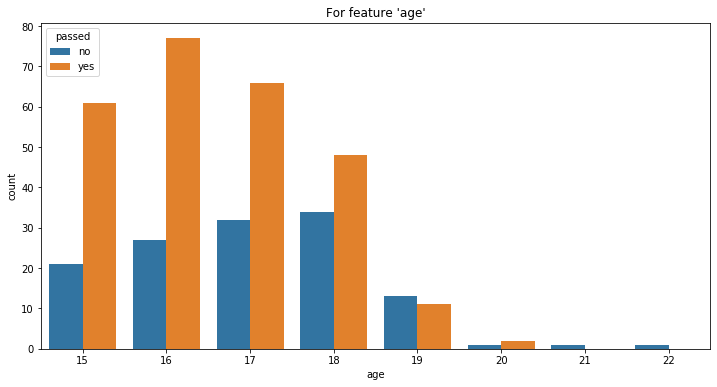

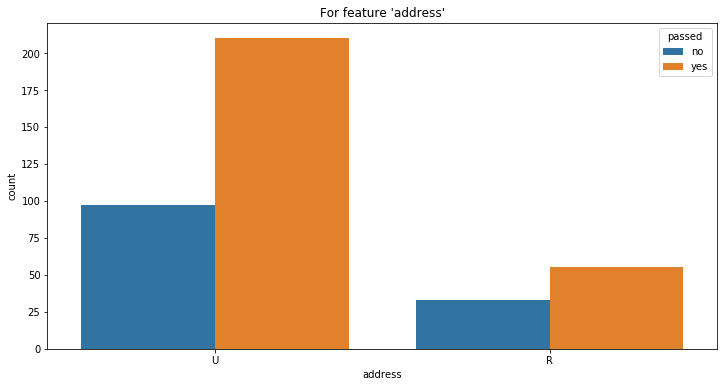

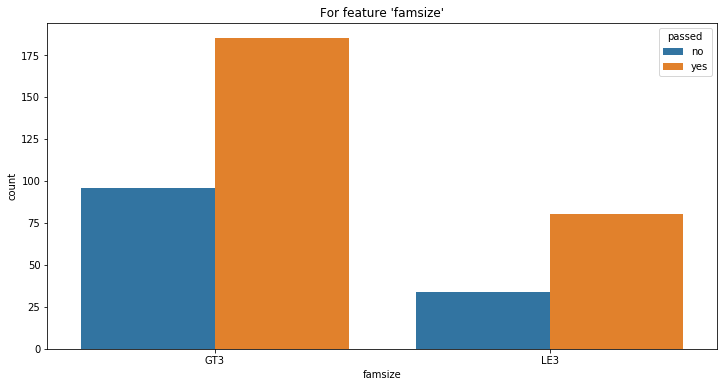

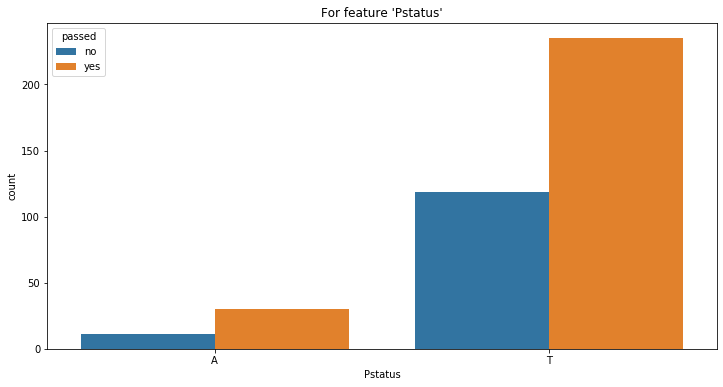

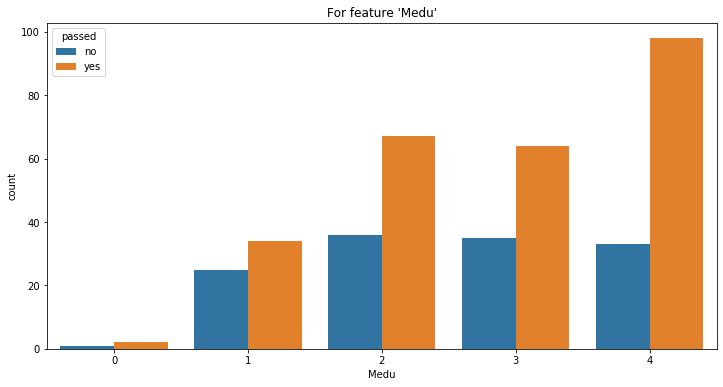

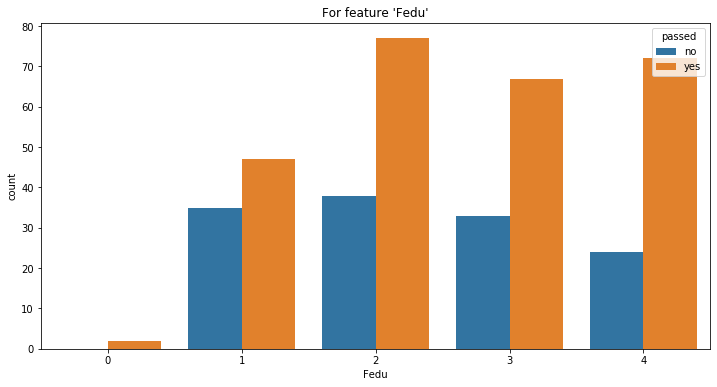

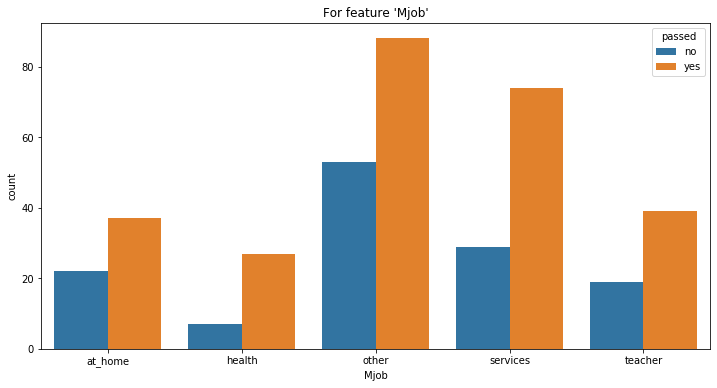

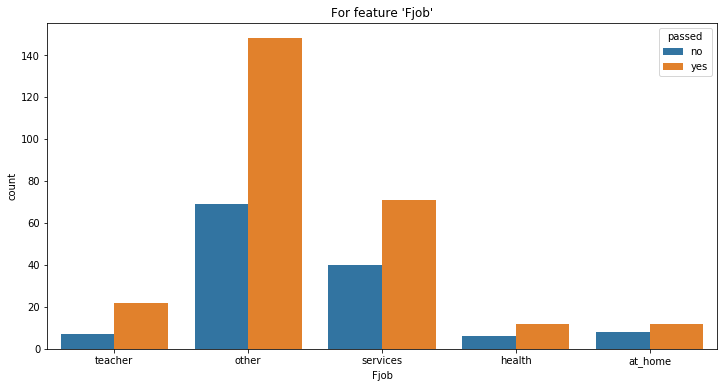

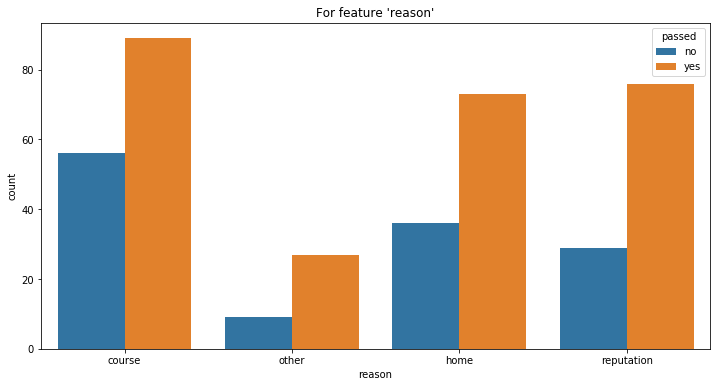

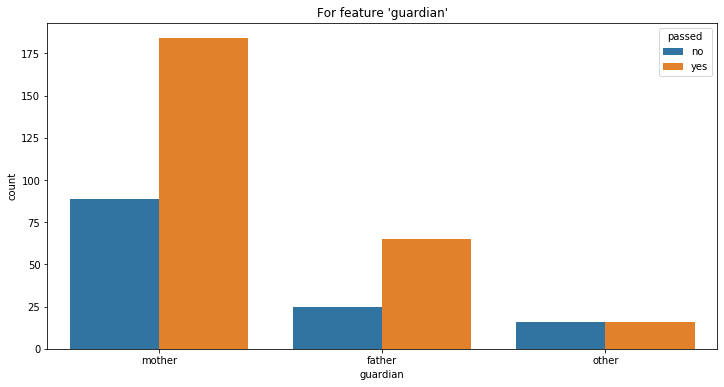

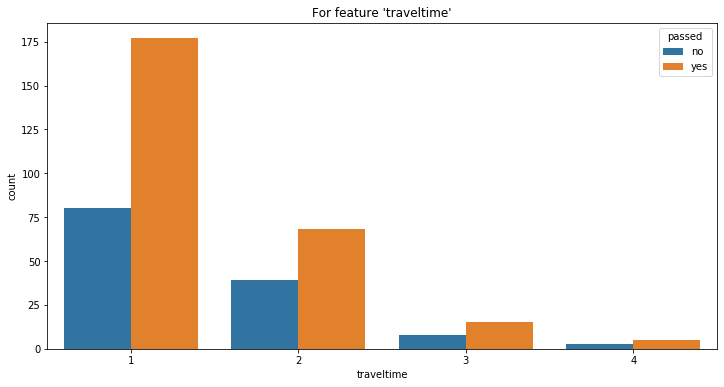

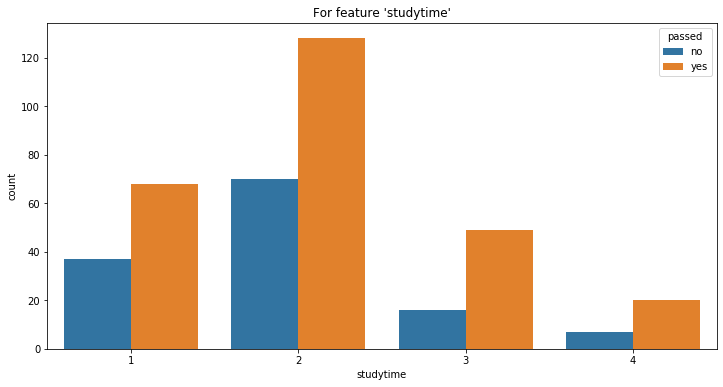

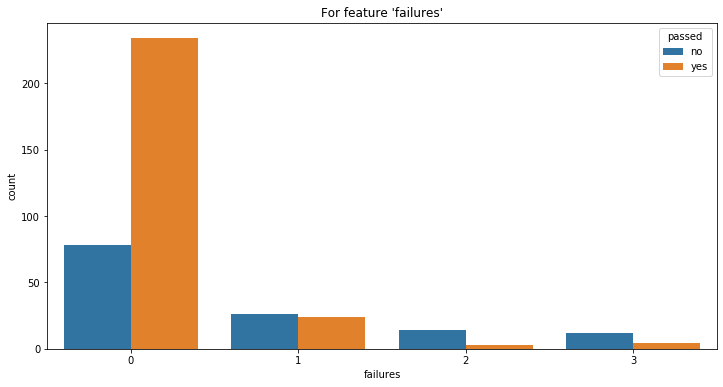

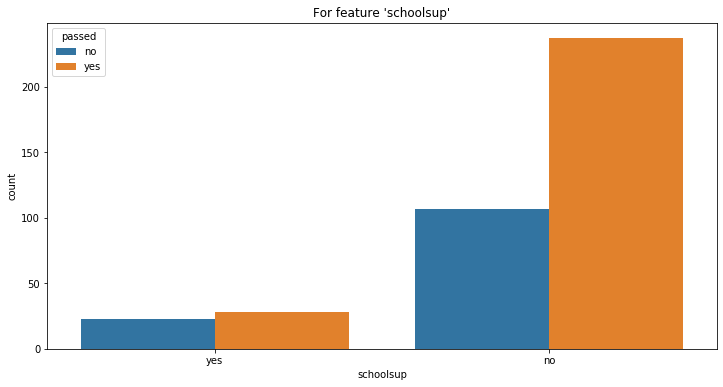

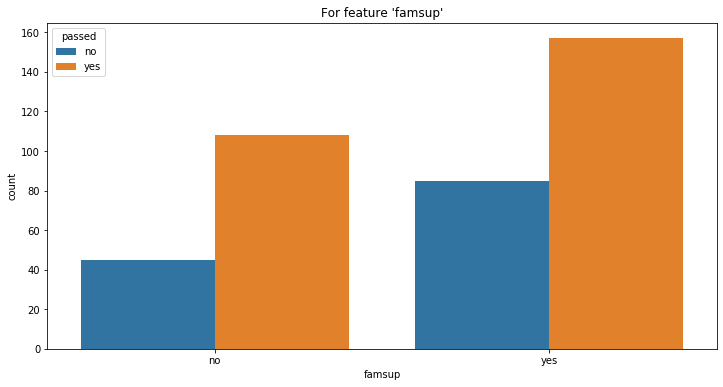

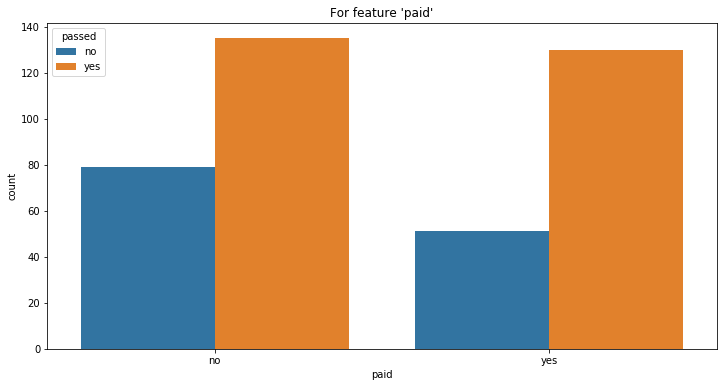

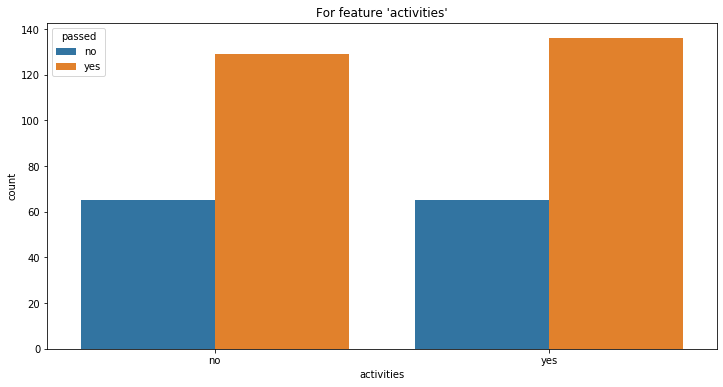

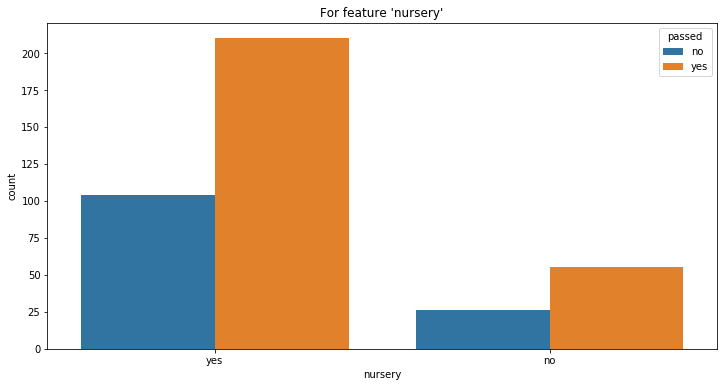

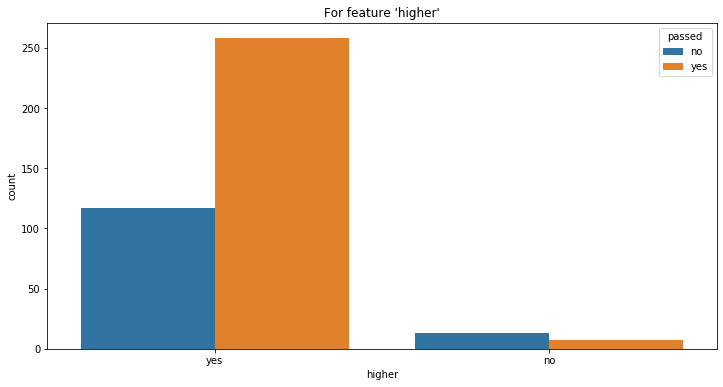

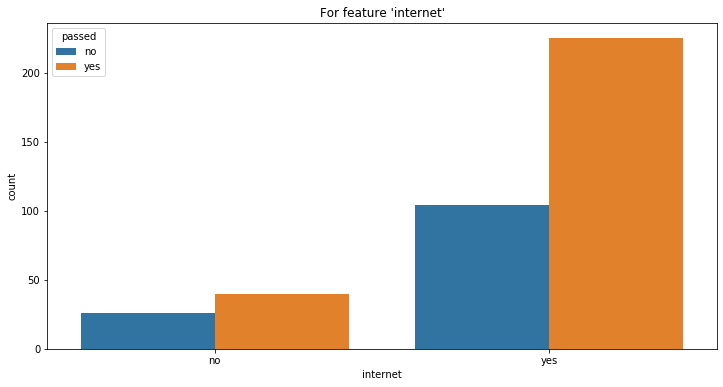

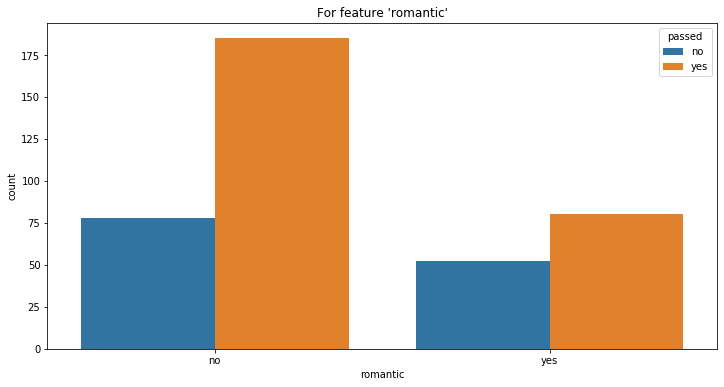

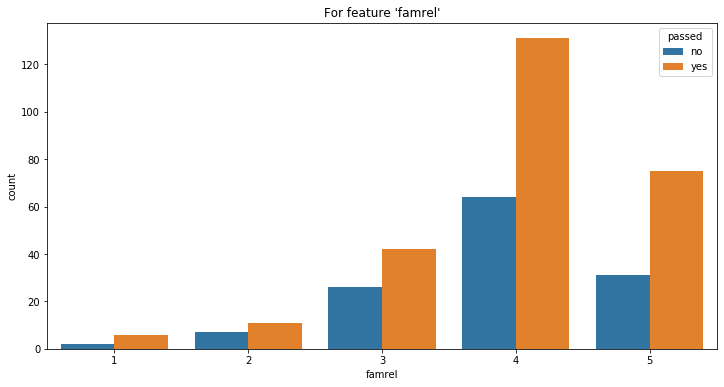

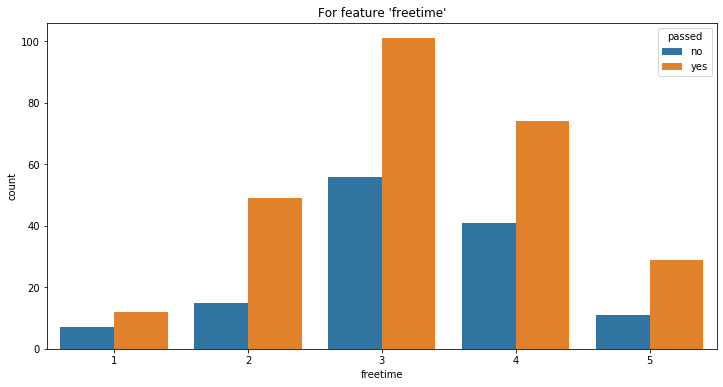

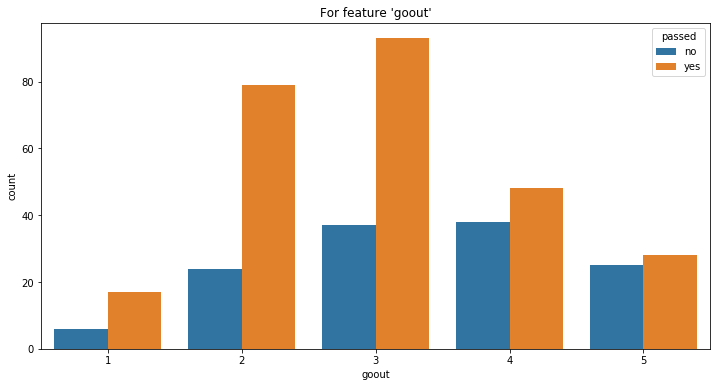

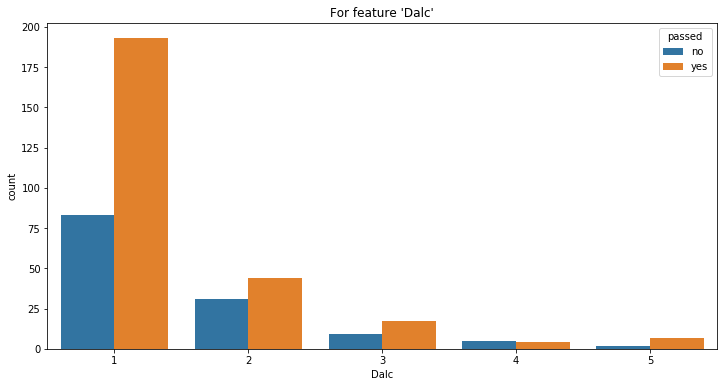

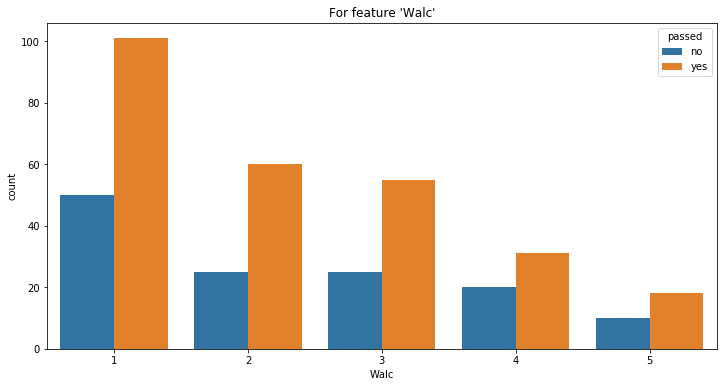

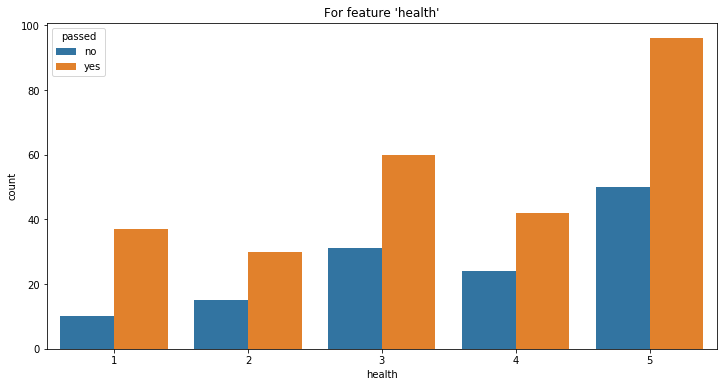

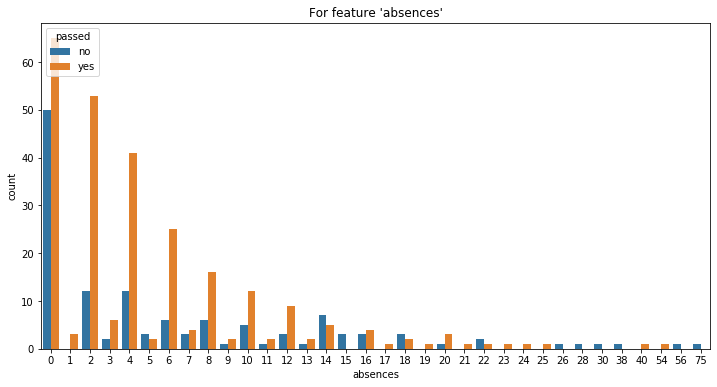

In [10]:
for i in student.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(student[i],hue=student['passed'])

# Feature Engineering

In [11]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [12]:
le=LabelEncoder()
list=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences','passed']
for val in list:
    student[val]=le.fit_transform(student[val].astype(str))

In [13]:
#check dataset once
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,3,1,0,0,4,4,0,4,...,0,0,3,2,3,0,0,2,29,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,4,2,2,0,0,2,24,0
2,0,0,0,1,1,1,1,1,0,2,...,1,0,3,2,1,1,2,2,2,1
3,0,0,0,1,0,1,4,2,1,3,...,1,1,2,1,1,0,0,4,12,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,3,2,1,0,1,4,24,1


Now it clear perfect....

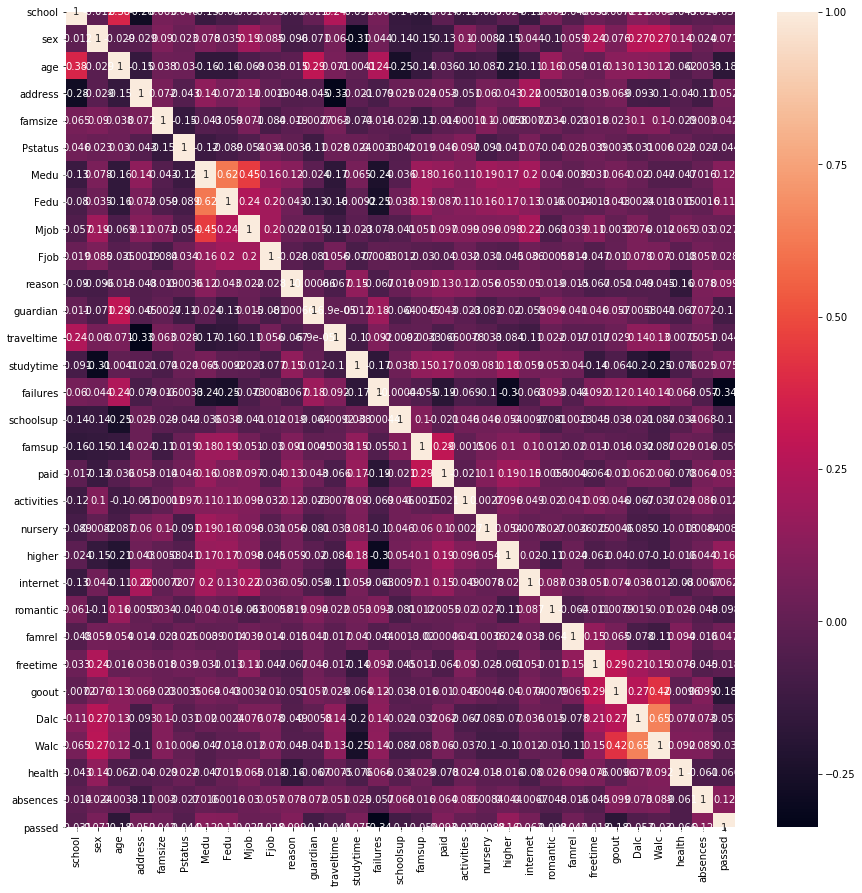

In [14]:
#check cor-relation
fig=plt.figure(figsize=(15,15))
sns.heatmap(student.corr(),annot=True)

# Splitting dataset

In [15]:
x=student.iloc[:,:-1]
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,2,3,0,0,2,29
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,4,2,2,0,0,2,24
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,3,2,1,1,2,2,2
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,2,1,1,0,0,4,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,3,2,1,0,1,4,24


In [16]:
y=student.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    1
4    1
Name: passed, dtype: int32

# check Distribution of skewness

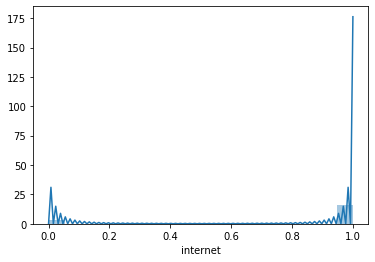

In [17]:
sns.distplot(student['internet'])

In [18]:
collist=student.columns
ncol=31
nrows=29

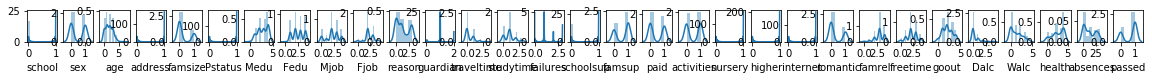

In [19]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(student[collist[i]])

In [20]:
x.skew()

school        2.400519
sex           0.106886
age           0.466270
address      -1.337481
famsize       0.936623
Pstatus      -2.607984
Medu         -0.318381
Fedu         -0.031672
Mjob         -0.335188
Fjob         -0.362303
reason        0.409568
guardian     -0.111546
traveltime    1.607029
studytime     0.632142
failures      2.387026
schoolsup     2.220534
famsup       -0.464291
paid          0.168315
activities   -0.035584
nursery      -1.466570
higher       -4.114829
internet     -1.791595
romantic      0.705766
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      0.354855
dtype: float64

Features has skewness and it's better to working on it...

In [21]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [22]:
x.skew()

school        2.400519
sex           0.106886
age           0.466270
address      -1.337481
famsize       0.936623
Pstatus      -2.607984
Medu         -0.318381
Fedu         -0.031672
Mjob         -0.335188
Fjob         -0.362303
reason        0.409568
guardian     -0.111546
traveltime    0.998263
studytime    -0.205676
failures      1.855862
schoolsup     2.220534
famsup       -0.464291
paid          0.168315
activities   -0.035584
nursery      -1.466570
higher       -4.114829
internet     -1.791595
romantic      0.705766
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          1.389246
Walc          0.064080
health       -0.494604
absences      0.354855
dtype: float64

# Applying Machine Learning Model

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

In [24]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [25]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [26]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()
gnb=GaussianNB()
svc=SVC()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.6329113924050633
Cross-val-score= 0.5618295739348371


roc_auc_score 0.5964912280701755


              precision    recall  f1-score   support

           0       0.33      0.53      0.41        19
           1       0.82      0.67      0.73        60

    accuracy                           0.63        79
   macro avg       0.57      0.60      0.57        79
weighted avg       0.70      0.63      0.66        79



[[10  9]
 [20 40]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


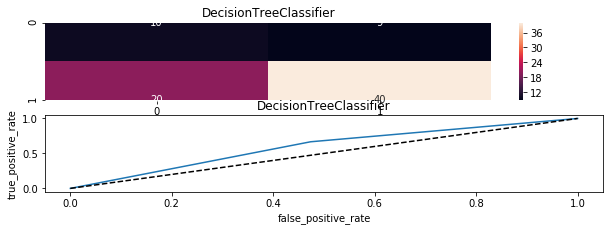

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.6075949367088608
Cross-val-score= 0.637562656641604


roc_auc_score 0.5258771929824562


              precision    recall  f1-score   support

           0       0.27      0.37      0.31        19
           1       0.77      0.68      0.73        60

    accuracy                           0.61        79
   macro avg       0.52      0.53      0.52        79
weighted avg       0.65      0.61      0.63        79



[[ 7 12]
 [19 41]]




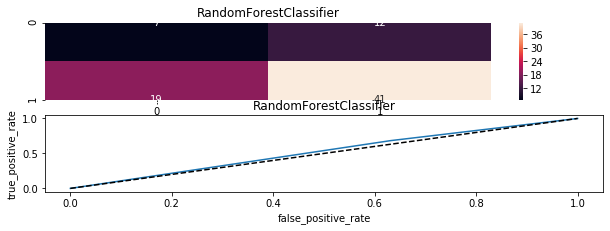

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.7215189873417721
Cross-val-score= 0.6683646616541353


roc_auc_score 0.6548245614035088


              precision    recall  f1-score   support

           0       0.43      0.53      0.48        19
           1       0.84      0.78      0.81        60

    accuracy                           0.72        79
   macro avg       0.64      0.65      0.64        79
weighted avg       0.74      0.72      0.73        79



[[10  9]
 [13 47]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


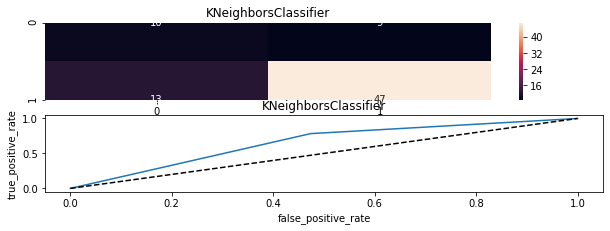

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.6708860759493671
Cross-val-score= 0.5676315789473685


roc_auc_score 0.6035087719298247


              precision    recall  f1-score   support

           0       0.36      0.47      0.41        19
           1       0.81      0.73      0.77        60

    accuracy                           0.67        79
   macro avg       0.59      0.60      0.59        79
weighted avg       0.71      0.67      0.68        79



[[ 9 10]
 [16 44]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


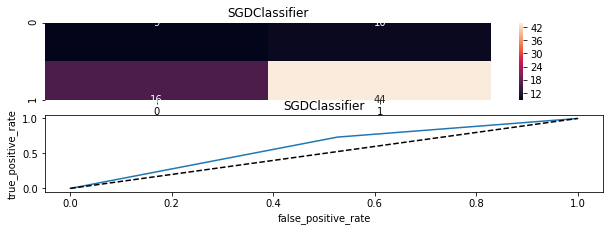

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.7721518987341772
Cross-val-score= 0.7010839598997494


roc_auc_score 0.7061403508771931


              precision    recall  f1-score   support

           0       0.52      0.58      0.55        19
           1       0.86      0.83      0.85        60

    accuracy                           0.77        79
   macro avg       0.69      0.71      0.70        79
weighted avg       0.78      0.77      0.78        79



[[11  8]
 [10 50]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


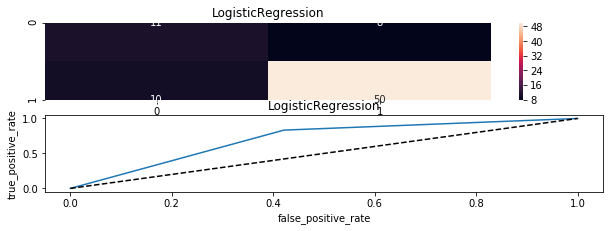

************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.7468354430379747
Cross-val-score= 0.6800313283208022


roc_auc_score 0.6355263157894737


              precision    recall  f1-score   support

           0       0.47      0.42      0.44        19
           1       0.82      0.85      0.84        60

    accuracy                           0.75        79
   macro avg       0.65      0.64      0.64        79
weighted avg       0.74      0.75      0.74        79



[[ 8 11]
 [ 9 51]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


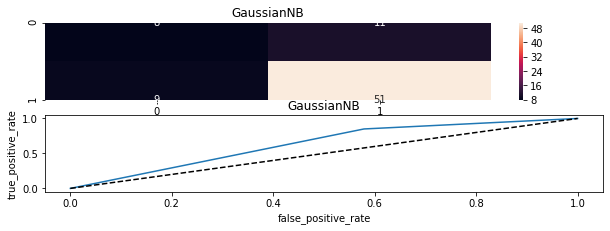

************** SVC ***********


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


accuracy score 0.810126582278481
Cross-val-score= 0.6914035087719298


roc_auc_score 0.6951754385964912


              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.85      0.92      0.88        60

    accuracy                           0.81        79
   macro avg       0.74      0.70      0.71        79
weighted avg       0.80      0.81      0.80        79



[[ 9 10]
 [ 5 55]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


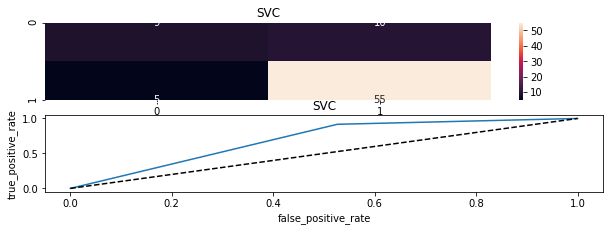

In [27]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))
models.append(('GaussianNB',gnb))
models.append(('SVC',svc))

#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()


In [28]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result


,Model,cvs,score,rocscore
0,DecisionTreeClassifier,56.182957,63.291139,59.649123
1,RandomForestClassifier,63.756266,60.759494,52.587719
2,KNeighborsClassifier,66.836466,72.151899,65.482456
3,SGDClassifier,56.763158,67.088608,60.350877
4,LogisticRegression,70.108396,77.215190,70.614035
5,GaussianNB,68.003133,74.683544,63.552632
6,SVC,69.140351,81.012658,69.517544


I'm going to select SVC because here we can observe score  as well as f-score is good for SVC only compared to all other algorithms.

# Grid Search For Hyperparameter Tuning

In [29]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
svc = SVC( random_state=4)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train, y_train)
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.651, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.651, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.717, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.686, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.657, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.651, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [30]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
cn=confusion_matrix(y_test,grid_predictions)
cn

array([[ 7, 12],
       [ 4, 56]], dtype=int64)

In [32]:
accuracy_score(y_test,grid_predictions)

0.7974683544303798

# Predicting Values

In [33]:
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('predicted passing:',pred)
print('actual passing',y_test)

predicted passing: [1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1]
actual passing 37     1
331    1
54     1
225    0
116    1
      ..
113    1
97     1
224    1
231    1
297    0
Name: passed, Length: 79, dtype: int32


# Saving Model

In [34]:
student=pd.DataFrame(pred)
student.to_csv('svc_student.csv')

In [35]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(svc,'student.obj')
#load the model from a file
svc_from_joblib=joblib.load('student.obj')
#use the loaded model to make prediction
svc_from_joblib.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Done upto now............